In [136]:
# Pandas- 데이터 핸들링
# Pandas 핵심객체: Series 와 DataFrame

import pandas as pd
import numpy as np



In [137]:

titanic_df = pd.read_csv(
    '../data/train.csv'    
)
titanic_df.head()

# 젋은 남성은 생존이 어떻게 됬을까?
# 여성&자식있을스록 생존확률 높다
# SibSp : 동승자
# Parch: 부모자식수
# Fare:요금 근데 한명이 다 낼수 있으니 조심해야함
# Cabin: 방번호
# Embarked: 선착장

# 데이터 구조 확인
titanic_df.info()

# 891 entries: 승객이 891명이다.
# Age          714 non-null    float64  대회라서 Age, cabin일부는 null 값 처리함
#  Cabin        204 non-null    object 

# <중요> Nan을 어떻게 채울거냐 --> 이게 중요함


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
titanic_df.shape

(891, 12)

In [102]:
titanic_df.describe() # 수치데이터에 대한 통계량 나온다.
# survived의 mean이 0에 가깝다? = 죽는사람이 더 많았다.
# pclass 2.3 = 3쪽에 가깝다고 할수 있음(2보단 3이 더 많았다)

#Fare 주의
#min :0.000000 다른사람이 돈 내준것도 있다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
# 컬럼형 데이터 분포 확인
# 범주형 Pclass
print(titanic_df['Pclass'].unique())
print(titanic_df['Pclass'].value_counts()) #값들의 갯수
print(titanic_df['Pclass'].value_counts()[3]) #값들의 갯수
print(titanic_df['Pclass'].value_counts()[1]) #값들의 갯수
print(titanic_df['Pclass'].value_counts()[2]) #값들의 갯수




[3 1 2]
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
491
216
184


In [104]:
# sex 범주형 data
print(titanic_df['Sex'].value_counts()) # 남자가 훨씬 많다.

# survived 생존여부
print(titanic_df['Survived'].value_counts())

# <주의> float인 나이는 연속형 변수라 value_counts 안됨

Sex
male      577
female    314
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64


In [105]:
# Embarked
print(titanic_df['Embarked'].value_counts(dropna=True)) # null 제외
print(titanic_df['Embarked'].value_counts(dropna=False)) # null 제외 X(null 갯수나옴)
#dropna: null은 drop 시켜라 / null 있는 데이터는 일단 null 제외시켜라




Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


In [106]:
# <중요!!!!!!!!> 4.4_1 DataFrame 과 다른 자료형(ndarray,list,dict=>dataframe) 간의 변환
# <중요!!!!!!!!> 4.4_2 DataFrame 과 다른 자료형(dataframe=>ndarray,list,dict) 간의 변환


# list=>dataframe
column_name = ['col1'] # 주의: 컬럼네임을 줄땐 하나여서 list 로 줘야함
list1 = [1,2,3]
df_list1 = pd.DataFrame(
    data = list1,
    columns = column_name
)

df_list1
# ndarray => dataframe
arr1 = np.array(list1) #ndarray
df_arr1 = pd.DataFrame(
    data=arr1, # data에 ndarray가 들어감(차이점)
    columns=column_name
    
)
df_arr1

# 4.4_2가 중요함


,col1
0,1
1,2
2,3


In [107]:
# 2차원 데이터
# 데이터(리스트) : 2행 3열
list2d = [
    [1,2,3],
    [11,22,33]
]

columns = ['col1','col2','col3']

df_list2d = pd.DataFrame(
    data=list2d,
    columns = columns
)

# ndarray => dataframe
arr2d = np.array(list2d) 
df_arr2d = pd.DataFrame(
    data = arr2d,
    columns=columns   
)
df_arr2d

,col1,col2,col3
0,1,2,3
1,11,22,33


In [108]:
# 딕셔너리로 데이터 프레임 만들기

dict_ = {
    'col1' : [1,11],
    'col2' : [2,12],
    'col3' : [3,13],
}
df_dict = pd.DataFrame(dict_)
df_dict

,col1,col2,col3
0,1,2,3
1,11,12,13


In [109]:
# <근데 이게 중요함>  DataFrame 과 다른 자료형(dataframe=>ndarray,list,dict) 간의 변환

# DataFrame(전처리) => values(ndarray나옴) : 머신러닝, 딥러닝 적용
arr3 = df_dict.values
print(arr3) # 결과 리스트 아님, ndarray 임
print(arr3.shape)


[[ 1  2  3]
 [11 12 13]]
(2, 3)


![비교]('ndarray비교.png')

In [110]:
# DataFrame(전처리) => Dict
dict3 = df_dict.to_dict()
print(dict3)

{'col1': {0: 1, 1: 11}, 'col2': {0: 2, 1: 12}, 'col3': {0: 3, 1: 13}}


In [111]:
# DataFrmae => list(많이 하지는 않음, 주로  ndarray 사용함)
# list3 = df_dict.tolist() # ndarray 에 있는 method 이다.즉 df에서는 실행 X
# print(list3) # 에러뜸

list3 = df_dict.values.tolist()  #.values 로 바꿔놓고 list로 바꿔야함
print(list3) 

[[1, 2, 3], [11, 12, 13]]


In [112]:
## 4.5열(Column) 데이터 생성 및 수정, 삭제

# Del Vs Drop
# Del : 시리즈(오브젝트) 삭제
# Drop: dataframe 에 있는 method전용

- 결론 datafarme 에서 loc 써라
- loc:명(이름)으로 접근해라(ex) 3가져와라~ 말고, 'age'가져와라~~~) 이렇게 이름을 가져오는게 편하잖아~~
- index,column,value다 ndararry로 되어있다
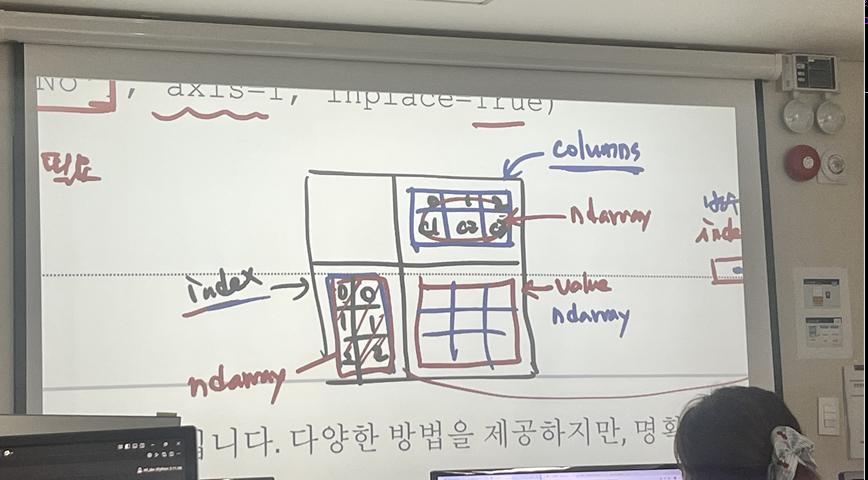


In [113]:
# iloc[]사용 예제
titanic_df
# data_df = titanic_df.set_index('Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Hea...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine ...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [114]:
# 세팅법(중략)
# pandas 출력결과 환경설정
# pd.set_option('특정 환경설정 키',value)

pd.set_option('display.width',1000) #보여지는 폭 설정
pd.set_option('display.max_colwidth',30)

titanic_df # 작아저 버렸어~~~

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Hea...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine ...",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [115]:
data_df = titanic_df.set_index('Name') # Name을 인덱스로 놓기
                                       # 단점: name이 중복될수도 있고 index 할때 name을 다 쳐야함.....
                                       # 실현한이유: iloc도 사용가능하다는거를 보여주기위해서 즉, 숫자index처리 보여줄라교
data_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
# 0행 , 2열 선택
print(data_df.iloc[0,2]) # 인덱싱:단일값 추출

# 0~2행, 0~3열 선택:슬라이싱
print(data_df.iloc[0:3,0:4])



3
                                PassengerId  Survived  Pclass     Sex
Name                                                                 
Braund, Mr. Owen Harris                   1         0       3    male
Cumings, Mrs. John Bradley ...            2         1       1  female
Heikkinen, Miss. Laina                    3         1       3  female


In [117]:
# Braund, Mr. Owen Harris,Heikkinen, Miss. Laina	
print(data_df.loc[['Braund, Mr. Owen Harris','Heikkinen, Miss. Laina'],:]) # 팬시색인 사용 ,이름으로 접근하니깐 loc 해야함

                         PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked
Name                                                                                                                      
Braund, Mr. Owen Harris            1         0       3    male  22.0      1      0         A/5 21171  7.250   NaN        S
Heikkinen, Miss. Laina             3         1       3  female  26.0      0      0  STON/O2. 3101282  7.925   NaN        S


In [138]:
# 불린 인덱싱
# 나이가 60세 이상은 승객 추출
# titanic_df[titanic_df['Age'] > 60] #DataFrame 다
# Pclass가 누군지 파악가능함 , loc,iloc안쓰면 컬럼선택이다
titanic_df[titanic_df['Age'] > 60][['Name','Age','Pclass']] # 컬럼 선택 []

# 3가지 조건으로 데이터 추출
cond1 = titanic_df['Age']>60 # 결과:불린
cond2 = titanic_df['Pclass']=1
cond3 = titanic_df['Sex']== 'female' # 대소문자 조심해야함~~

titanic_df[cond1 & cond2 & cond3] # 위에 3개조건 다 만족하는 T&T&T 인 경우만 출력함
                                  # and, or

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Th...",female,63.0,1,0,13502,77.9583,D7,S
483,484,1,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson ...",female,62.0,0,0,113572,80.0000,B28,NaN


In [139]:
# 4.7 정렬,집계,그룹화

# 전체 숫자 열에 대한 평균
# titanic_df.mean() # 그냥 mean 해버리면 error 남
# unsupported operand type(s) for +: 'int' and 'str' 

titanic_df.mean(numeric_only=True)# 넘버링=Treu 주면 문자없애고 숫자만 평균구할수 있게 가능

PassengerId    446.000000
Survived         0.383838
Pclass           1.000000
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [131]:
titanic_df['Age'].max()

np.float64(80.0)

In [140]:
## Pclass 를 기준으로 그룹화하고, 각 그룹의 'Age' 열의 평균을 계산
# groupby - 그룹화

agg_format = {'PassengerId':'count','Age':'mean','Fare':'max'}
titanic_df.groupby('Pclass').agg(agg_format)

,PassengerId,Age,Fare
Pclass,,,
1,891,29.699118,512.3292


In [142]:
#  결측치
#  확인
titanic_df.isna() # dataframe 에서 결과나옴
titanic_df.isna().sum() #sum() : 컬럼별 True 의 갯수연산
titanic_df.isna().mean() # percent 로 null 확인 ->cabin null 너무많으니까 지울까?~이런 결론이 나옴
                        # 근데 Null 을 채우는게 kaggle 의 목적임



PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [145]:
# 결측치 채우기 fillNa
age_mean = titanic_df['Age'].mean()
titanic_df['Age'].mean()# 이값으로 평균처리하면 많이죽은(20대)의 값으로 대체되기때문에 결측값처리된사람 다 죽은사람됨~

# 결론) 무조건평균으로 처리하는게 좋은것은 아니다~~~~"너 죽어! 이렇게 되니까"

np.float64(29.69911764705882)

In [ ]:
# 딥러닝 관점에서 분산이 큰게 좋을까 작은게 좋을까?
# 분산이 큰게 좋다~~~ 왜냐면 분산인 정보량이니까
# 분산이 작을수록 평균근처에만 있다는 뜻
# 분산 = 정보량~~~~~~~

In [149]:
titanic_df['Embarked'].mode()# .mode() - 빈도가 가장 높은것을 Series 로 추출
titanic_df['Embarked'].mode()[0]#

# s: south Entrance

'S'

In [151]:
# 일반함수 : 오브젝트 생성 X(선언,정의만 한다)

# lambda표현식 


In [ ]:
def name_len(x):
    return len(x)

# 3가지가 가능함
titanic_df['Name_length'] =titanic_df['Name'].apply(name_len) # apply에 name_len도 들어갈수 있다.
                                                              # def 한 함수도 들어갈수 있다.
titanic_df['Name_length'] =titanic_df['Name'].apply(lambda x:len(x))
titanic_df['Name_length'] =titanic_df['Name'].apply(lambda x:name_len(x))
titanic_df[['Name','Name_length']].head()

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Hea...",44
4,"Allen, Mr. William Henry",24


In [160]:
# 연속형 데이터인 나이 -> 범주형 data로 바꾸기

In [163]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x:'Child'if x <=15 else 'Adult')
titanic_df[['Age','Child_Adult']].head()



,Age,Child_Adult
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
